# Muestreo

En este notebook vamos a explorar la generación de variables aleatorias de diversos tipos de distribuciones. 
Las principales metodologías a estudiar son:
+ El método de la transformada inversa
+ El método de aceptación y rechazo

Este [sabe](http://www.math.wm.edu/~leemis/chart/UDR/UDR.html)

In [1]:
%matplotlib inline
import os
from ipywidgets import widgets
from IPython.display import display
from sympy import init_printing
from sympy import *
import collections
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
#import numpy as np
import scipy
from scipy.stats import beta, uniform, triang, norm, gamma, erlang, lognorm, weibull_min
from matplotlib import pyplot as plt
#TODO
sns.set(context='talk',style='whitegrid',font='serif')
from matplotlib import rc
rc('text', usetex=False)
plt.rc('font', family='serif') 

## Método de la Transformada Inversa

Para comenzar la discusión, exploremos una aplicación del método en un función exponencial. La función de densidad y la función acumulada de densidad se presentan a continuación

In [2]:
def expon_pdf(x, lmabd=1):
    """PDF of exponential distribution."""
    return lmabd*np.exp(-lmabd*x)

In [3]:
def expon_cdf(x, lambd=1):
    """CDF of exponetial distribution."""
    return 1 - np.exp(-lambd*x)

La inversa de la función de densidad acumulada de la exponencial esta dada por: $-\frac{1}{\beta}~log(1-U)$, donde $U$ representa una variable aleatoria que se distribuye uniforme entre 0 y 1.

In [4]:
def expon_icdf(p, lambd=1):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-p)/lambd

Con esta información se puede muestrear desde una función de densidad con parámetro $\beta$

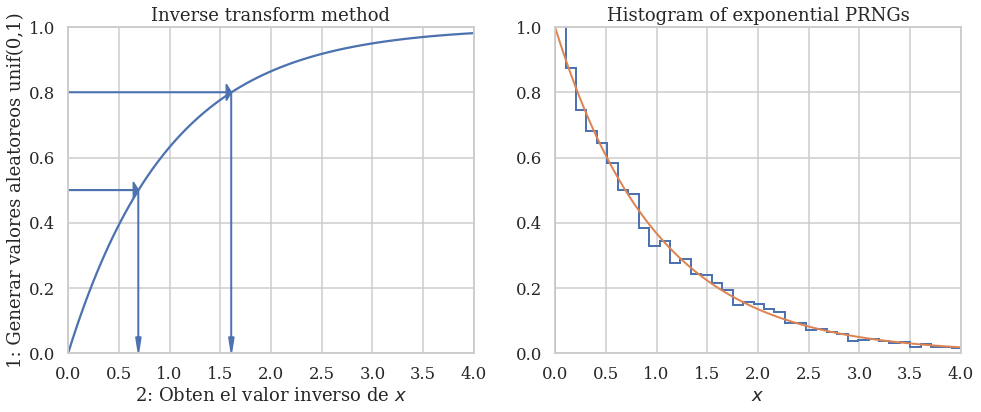

In [8]:
dist = stats.expon()
x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

plt.figure(figsize=(16,6))  
plt.subplot(121) # Primera ubicación en el gráfico
plt.plot(x, dist.cdf(x)) # esta es la distribución teórica.
plt.axis([0, 4, 0, 1])
for q in [0.5, 0.8]:
    plt.arrow(0, q, expon_icdf(q)-0.05, 0, head_width=0.05, head_length=0.05, fc='b', ec='b')
    plt.arrow(expon_icdf(q), q, 0, -q+0.05, head_width=0.05, head_length=0.05, fc='b', ec='b')
plt.ylabel('1: Generar valores aleatoreos unif(0,1)')
plt.xlabel('2: Obten el valor inverso de $x$')
plt.title('Inverse transform method');

plt.subplot(122) # Segunda ubicación en el array 1x2 (una fila 2 columnas)
u = np.random.random(10000)
v = expon_icdf(u)
plt.hist(v, histtype='step', bins='auto', density = True, linewidth=2)
plt.plot(x, expon_pdf(x), linewidth=2)
plt.axis([0,4,0,1])
plt.title('Histogram of exponential PRNGs')
plt.xlabel('$x$');


In [10]:
x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

def inverse_method(lamb):
    #dist = stats.expon(lamb)
    plt.figure(figsize=(16,6))  
    plt.subplot(121) # Primera ubicación en el gráfico
    plt.plot(x, expon_cdf(x,lamb)) # esta es la distribución teórica.
    plt.axis([0, 4, 0, 1])
    for q in [0.5, 0.8]:
        plt.arrow(0, q, expon_icdf(q,lamb)-0.05, 0, head_width=0.05, head_length=0.05, fc='b', ec='b')
        plt.arrow(expon_icdf(q,lamb), q, 0, -q+0.05, head_width=0.05, head_length=0.05, fc='b', ec='b')
    plt.ylabel('1: Generar valores aleatoreos unif(0,1)')
    plt.xlabel('2: Obten el valor inverso de $x$')
    plt.title('Inverse transform method');

    plt.subplot(122) # Segunda ubicación en el array 1x2 (una fila 2 columnas)
    u = np.random.random(10000)
    v = expon_icdf(u,lamb)
    plt.hist(v, histtype='step', bins='auto', density = True, linewidth=2)
    h = expon_pdf(x,lamb)
    lim = np.max(h)
    plt.plot(x, h, linewidth=2)
    plt.axis([0,4,0,lim+0.2*lim])
    plt.title('Histogram of exponential PRNGs')
    plt.xlabel('$x$')
    plt.show()

input1Float = widgets.FloatSlider(value=1, min=0.01, max=3, step=0.01, description="$\lambda$:", orientation="horizontal")

widgets.interactive(inverse_method, lamb=input1Float)

interactive(children=(FloatSlider(value=1.0, description='$\\lambda$:', max=3.0, min=0.01, step=0.01), Output(…

Ahora podemos aplicar el método tanto a funciones continuas como a discretas. La condición es que podamos encontar una forma cerrada para la función de densidad acumulada y que la función inversa no sea muy difícil de calcular. Aprovechando lo aprendido en la sección de distribuciones, tenemos:

# Distribución Beta, caso Beta$(\alpha, 1)$, con $\alpha>0$

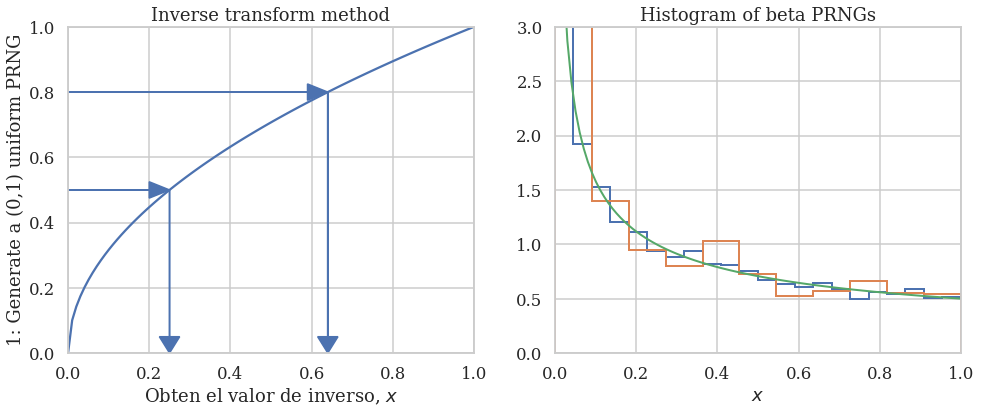

In [13]:
alpha=0.5

def beta_icdf(q,alpha):
    """Inverse CDF of beta(alpha,1) distribution"""
    return q**(1/alpha)
dist = beta(alpha,1)
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)

plt.figure(figsize=(16,6))  
plt.subplot(121) # Primera ubicación en el gráfico
plt.plot(x, dist.cdf(x)) # esta es la distribución teórica.
plt.axis([0, 1, 0, 1])
for q in [0.5, 0.8]:
    plt.arrow(0, q, beta_icdf(q,alpha)-0.05, 0, head_width=0.05, head_length=0.05, fc='b', ec='b')
    plt.arrow(beta_icdf(q,alpha), q, 0, -q+0.05, head_width=0.05, head_length=0.05, fc='b', ec='b')
plt.ylabel('1: Generate a (0,1) uniform PRNG')
plt.xlabel('Obten el valor de inverso, $x$')
plt.title('Inverse transform method');

plt.subplot(122) # Segunda ubicación en el array 1x2 (una fila 2 columnas)
u = np.random.random(10000)
v = beta_icdf(u,alpha) # Genera variables aleatorias por el método de la inversa
plt.hist(v, histtype='step', bins='auto', density = True, linewidth=2)
plt.hist(dist.rvs(size=1000),histtype='step', bins='auto', density = True, linewidth=2) # Genera variables aleatorias en scipy
plt.plot(x, dist.pdf(x), linewidth=2)
plt.axis([0,1,0,3])
plt.title('Histogram of beta PRNGs')
plt.xlabel('$x$');

In [17]:
def inverse_method_beta(alpha):
    plt.figure(figsize=(16,6)) 
    x = np.linspace(0,1,100)
    y = np.linspace(0,1,100)
    plt.subplot(121) # Primera ubicación en el gráfico
    dist = beta(alpha,1)
    plt.plot(x, dist.cdf(x)) # esta es la distribución teórica.
    plt.axis([0, 1, 0, 1])
    for q in [0.5, 0.8]:
        plt.arrow(0, q, beta_icdf(q,alpha)-0.05, 0, head_width=0.05, head_length=0.05, fc='b', ec='b')
        plt.arrow(beta_icdf(q,alpha), q, 0, -q+0.05, head_width=0.05, head_length=0.05, fc='b', ec='b')
    plt.ylabel('1: Generar valores aleatoreos unif(0,1)')
    plt.xlabel('2: Obten el valor inverso de $x$')
    plt.title('Inverse transform method');

    plt.subplot(122) # Segunda ubicación en el array 1x2 (una fila 2 columnas)
    u = np.random.random(10000)
    v = beta_icdf(u,alpha)
    plt.hist(v, histtype='step', bins='auto', density = True, linewidth=2)
    h=dist.pdf(x)
    lim=np.max(h)
    plt.plot(x, h, linewidth=2)
    plt.axis([0,1,0,3])
    plt.title('Histogram of exponential PRNGs')
    plt.xlabel('$x$')
    plt.show()

input1Float = widgets.FloatSlider(value=1, min=0.1, max=3, step=0.01, description=r"$\alpha$:", orientation="horizontal")

widgets.interactive(inverse_method_beta, alpha=input1Float)

interactive(children=(FloatSlider(value=1.0, description='$\\alpha$:', max=3.0, min=0.1, step=0.01), Output())…

# Distribución Beta, caso Beta$(1,\beta)$, con $\beta>0$

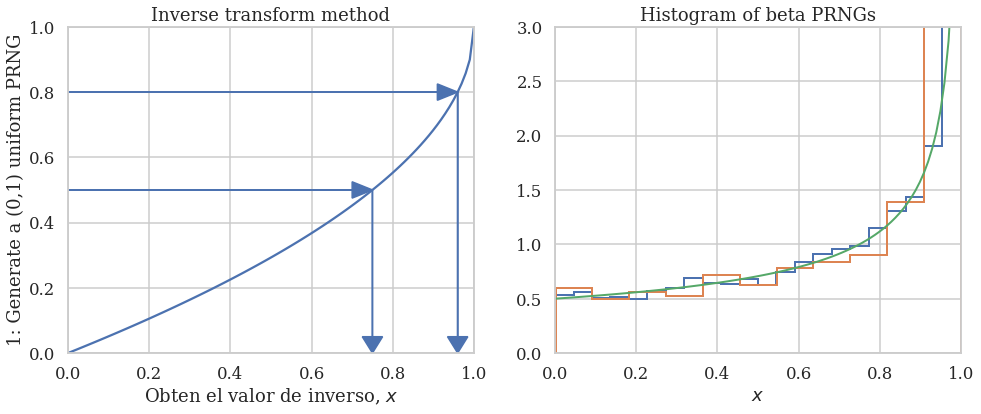

In [19]:
b=0.5

def beta_icdf(q,b):
    """Inverse CDF of beta(alpha,1) distribution"""
    return 1-(1-q)**(1/b)
     
dist = beta(1,b)
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)

plt.figure(figsize=(16,6))  
plt.subplot(121) # Primera ubicación en el gráfico
plt.plot(x, dist.cdf(x)) # esta es la distribución teórica.
plt.axis([0, 1, 0, 1])
for q in [0.5, 0.8]:
    plt.arrow(0, q, beta_icdf(q,b)-0.05, 0, head_width=0.05, head_length=0.05, fc='b', ec='b')
    plt.arrow(beta_icdf(q,b), q, 0, -q+0.05, head_width=0.05, head_length=0.05, fc='b', ec='b')
plt.ylabel('1: Generate a (0,1) uniform PRNG')
plt.xlabel('Obten el valor de inverso, $x$')
plt.title('Inverse transform method');

plt.subplot(122) # Segunda ubicación en el array 1x2 (una fila 2 columnas)
u = np.random.random(10000)
v = beta_icdf(u,b) # Genera variables aleatorias por el método de la inversa
plt.hist(v, histtype='step', bins='auto', density = True, linewidth=2)
plt.hist(dist.rvs(size=1000),histtype='step', bins='auto', density = True, linewidth=2) # Genera variables aleatorias en scipy
plt.plot(x, dist.pdf(x), linewidth=2)
plt.axis([0,1,0,3])
plt.title('Histogram of beta PRNGs')
plt.xlabel('$x$');

# Distribución Weibull

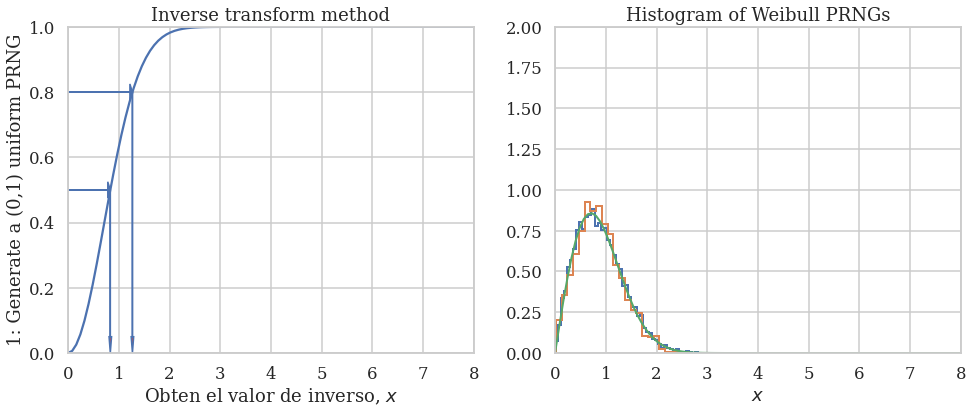

In [21]:
a=2
b=1

def weibull_icdf(q,a,b):
    """Inverse CDF of beta(alpha,1) distribution"""
    return b*(-np.log(1-q))**(1/a)
     
dist = weibull_min(c=a, scale=b)
x = np.linspace(0,8,100)
y = np.linspace(0,4,100)

plt.figure(figsize=(16,6))  
plt.subplot(121) # Primera ubicación en el gráfico
plt.plot(x, dist.cdf(x)) # esta es la distribución teórica.
plt.axis([0, 8, 0, 1])
for q in [0.5, 0.8]:
    plt.arrow(0, q, weibull_icdf(q,a,b)-0.05, 0, head_width=0.05, head_length=0.05, fc='b', ec='b')
    plt.arrow(weibull_icdf(q,a,b), q, 0, -q+0.05, head_width=0.05, head_length=0.05, fc='r', ec='b')
plt.ylabel('1: Generate a (0,1) uniform PRNG')
plt.xlabel('Obten el valor de inverso, $x$')
plt.title('Inverse transform method');

plt.subplot(122) # Segunda ubicación en el array 1x2 (una fila 2 columnas)
u = np.random.random(10000)
v = weibull_icdf(u,a,b) # Genera variables aleatorias por el método de la inversa
plt.hist(v, histtype='step', bins='auto', density = True, linewidth=2)
plt.hist(dist.rvs(size=1000),histtype='step', bins='auto', density = True, linewidth=2) # Genera variables aleatorias en scipy
plt.plot(x, dist.pdf(x), linewidth=2)
plt.axis([0,8,0,2])
plt.title('Histogram of Weibull PRNGs')
plt.xlabel('$x$');

# Muestreo desde una Distribución Discreta

El muestreo desde una distribución discreta se reduce principalmente al concepto de **lookup table** donde se selecciona el valor asignado al intervalo en el cual cae la variable aleatoria $U$

En esta sección vamos a utilzar *sympy* que es la implementación python de *wolfram alpha*.

In [22]:
import sympy as S
xs=S.symbols('x')
F=sum([S.Heaviside(xs-i+1) for i in range(1,7)])/6
display(F)

Heaviside(x)/6 + Heaviside(x - 5)/6 + Heaviside(x - 4)/6 + Heaviside(x - 3)/6 + Heaviside(x - 2)/6 + Heaviside(x - 1)/6

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


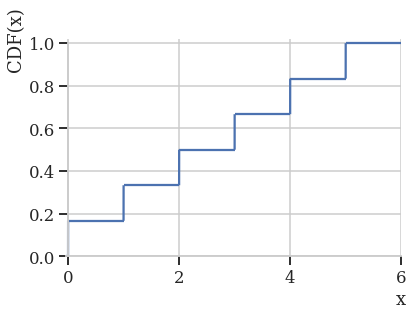

In [23]:
S.plot(F,(xs,-0.03,6),ylabel='CDF(x)',xlabel='x',ylim=(0,1.02));

In [24]:
from __future__ import division
invF=S.Piecewise((1,xs<=1/6),    # if uniform sample between 0 and 1/6, choose die-side labeled 1
                 (2,xs<=2/6),
                 (3,xs<=3/6),
                 (4,xs<=4/6),
                 (5,xs<=5/6),
                 (6,xs<=1))
invF

Piecewise((1, x <= 0.166666666666667), (2, x <= 0.333333333333333), (3, x <= 0.5), (4, x <= 0.666666666666667), (5, x <= 0.833333333333333), (6, x <= 1))

In [25]:
samples=np.array([invF.subs(xs,i) for i in  np.random.rand(500)])  #  Subs stands for substitution
samples.astype(np.float)

array([2., 3., 4., 2., 6., 4., 6., 6., 4., 2., 5., 4., 6., 3., 5., 1., 1.,
       6., 2., 4., 5., 3., 2., 3., 3., 6., 3., 4., 4., 1., 2., 4., 1., 6.,
       2., 5., 3., 5., 5., 1., 1., 2., 4., 3., 5., 3., 3., 1., 1., 4., 3.,
       2., 4., 5., 6., 4., 2., 6., 5., 1., 5., 5., 6., 3., 3., 4., 3., 1.,
       2., 6., 4., 4., 5., 3., 3., 6., 1., 5., 6., 6., 3., 5., 1., 5., 2.,
       3., 5., 3., 2., 2., 2., 1., 2., 6., 1., 4., 6., 5., 3., 6., 5., 6.,
       4., 4., 2., 5., 3., 1., 1., 1., 4., 2., 6., 4., 3., 5., 4., 3., 2.,
       5., 1., 1., 5., 6., 6., 6., 4., 5., 4., 6., 1., 2., 2., 1., 4., 4.,
       6., 2., 2., 3., 5., 3., 1., 3., 3., 2., 5., 3., 4., 2., 6., 5., 1.,
       2., 3., 2., 3., 2., 4., 4., 6., 1., 6., 4., 4., 2., 4., 4., 4., 1.,
       2., 4., 6., 1., 3., 4., 6., 5., 3., 3., 5., 4., 6., 6., 4., 5., 2.,
       1., 1., 4., 5., 4., 1., 4., 4., 4., 1., 3., 6., 6., 3., 6., 3., 1.,
       3., 5., 6., 2., 3., 4., 4., 4., 5., 6., 3., 1., 5., 4., 1., 1., 6.,
       6., 1., 4., 1., 5.

Text(0.5, 0, 'x')

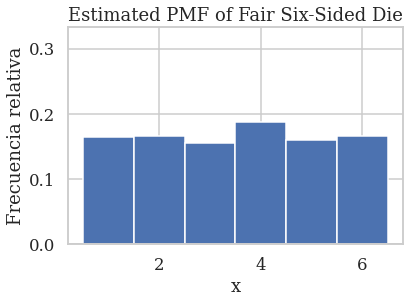

In [27]:
plt.hist(samples.astype(np.float), bins=[1,2,3,4,5,6,7], density = True, align='left');
plt.axis(ymax=2/6.)
plt.title('Estimated PMF of Fair Six-Sided Die');
plt.ylabel('Frecuencia relativa')
plt.xlabel('x')

In [28]:
p = np.array([1,2,9,2,1,1]) # the faces 2,4 and more probable than 1,5,6 and 3 is the most probable
p = p/sum(p) # normalize to 1
Fu = sum([S.Heaviside(xs-i+1)*p[i-1] for i in range(1,7)])
Fu

0.0625*Heaviside(x) + 0.0625*Heaviside(x - 5) + 0.0625*Heaviside(x - 4) + 0.125*Heaviside(x - 3) + 0.5625*Heaviside(x - 2) + 0.125*Heaviside(x - 1)

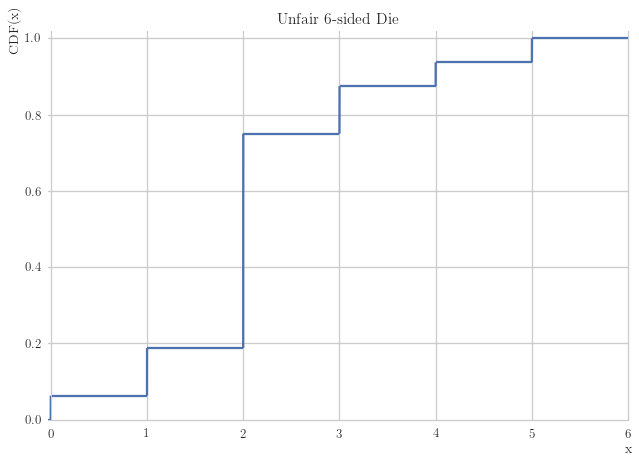

In [ ]:
S.plot(Fu,(xs,-0.03,6),ylabel='CDF(x)',xlabel='x',title='Unfair 6-sided Die',ylim=(0,1.02));

In [29]:
cp=np.cumsum([0]+p.tolist()) # need to find edges on vertical axis, add [0] to get left edge
invFu=S.Piecewise(*[(i,xs<=k) for i,k in zip(range(1,7),cp[1:])])
invFu

Piecewise((1, x <= 0.0625), (2, x <= 0.1875), (3, x <= 0.75), (4, x <= 0.875), (5, x <= 0.9375), (6, x <= 1.0))

Text(0.5, 0, 'x')

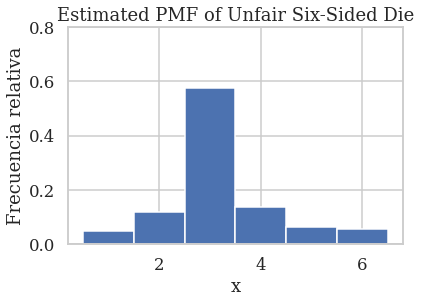

In [31]:
samples = np.array([invFu.subs(xs,i) for i in  np.random.rand(1000)])
samples = samples.astype(np.float)
plt.hist(samples, bins=[1,2,3,4,5,6,7], density = True, align='left');
plt.axis(ymax=0.8)
plt.title('Estimated PMF of Unfair Six-Sided Die');
plt.ylabel('Frecuencia relativa')
plt.xlabel('x')

 # Método de Aceptación-Rechazo

Text(0.5, 0, '$x$')

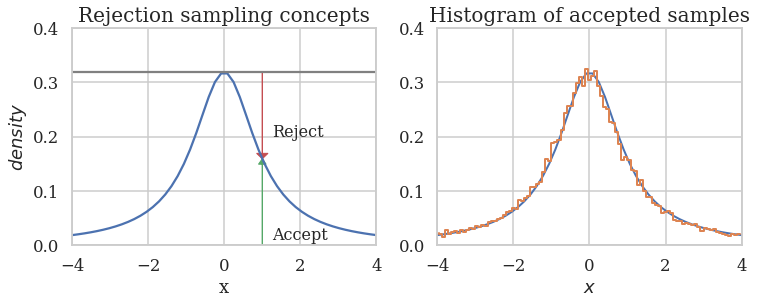

In [33]:
x = np.linspace(-4, 4)

df = 10
dist = stats.cauchy()
upper = dist.pdf(0)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x, dist.pdf(x))
plt.axhline(upper, color='grey')
px = 1.0
plt.arrow(px,0,0,dist.pdf(1.0)-0.01, linewidth=1,
head_width=0.2, head_length=0.01, fc='g', ec='g')
plt.arrow(px,upper,0,-(upper-dist.pdf(px)-0.01), linewidth=1,
              head_width=0.3, head_length=0.01, fc='r', ec='r')
plt.text(px+.25, 0.2, 'Reject', fontsize=16)
plt.text(px+.25, 0.01, 'Accept', fontsize=16)
plt.axis([-4,4,0,0.4])
plt.title('Rejection sampling concepts', fontsize=20)
plt.ylabel(r'$density$')
plt.xlabel(r'x')
plt.subplot(122)
n = 100000
# generate from sampling distribution
u = np.random.uniform(-4, 4, n)
# accept-reject criterion for each point in sampling distribution
r = np.random.uniform(0, upper, n)
# accepted points will come from target (Cauchy) distribution
v = u[r < dist.pdf(u)] # En que lugar los r son menores que la densidad de probabilidad de la PDF que se busca muestrear

plt.plot(x, dist.pdf(x), linewidth=2)

# Plot scaled histogram
factor = dist.cdf(4) - dist.cdf(-4)
hist, bin_edges = np.histogram(v, bins=100, density = True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
plt.step(bin_centers, factor*hist, linewidth=2)

plt.axis([-4,4,0,0.4])
plt.title('Histogram of accepted samples', fontsize=20);
plt.xlabel(r'$x$')

## El caso de una función cualquiera

Se le pide que obtenga una muestra aleatoria de la función f= lambda x: np.exp(-(x-1)**2/2./x)*(x+1)/12.

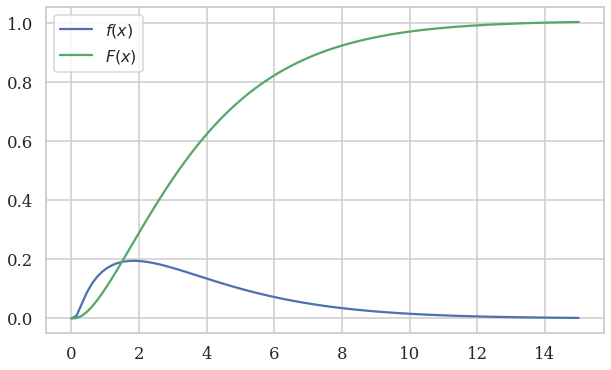

In [34]:
x = np.linspace(0.001,15,100)
fig,ax= plt.subplots()
fig.set_size_inches((10,6))
f= lambda x: np.exp(-(x-1)**2/2./x)*(x+1)/12.
fx = f(x)
ax.plot(x,fx,label='$f(x)$')
ax.plot(x,np.cumsum(fx)*np.diff(x)[0],'g',label='$F(x)$')
ax.legend(loc='best',fontsize=16);

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


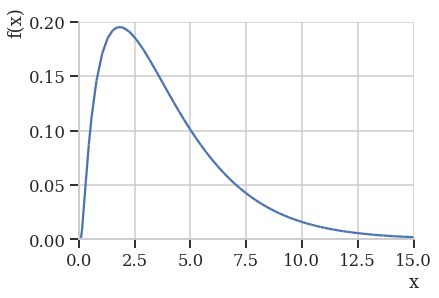

In [35]:
f_= exp(-(xs-1)**2/2./xs)*(xs+1)/12.
plot(f_, (xs, 0, 15), ylim=(0,0.2))

In [36]:
df1 = diff(f_,xs)
df1

0.0833333333333333*(x + 1)*(-0.5*(2*x - 2)/x + 0.5*(x - 1)**2/x**2)*exp(-0.5*(x - 1)**2/x) + 0.0833333333333333*exp(-0.5*(x - 1)**2/x)

In [37]:
critical = solve(Eq(df1, 0))
critical

[1.83928675521416,
 -0.419643377607081 - 0.606290729207199*I,
 -0.419643377607081 + 0.606290729207199*I]

In [38]:
df2 = diff(df1)
df2

0.0833333333333333*(x + 1)*(-0.5*(2*x - 2)/x + 0.5*(x - 1)**2/x**2)**2*exp(-0.5*(x - 1)**2/x) + 0.0833333333333333*(x + 1)*(-1.0/x + 1.0*(2*x - 2)/x**2 - 1.0*(x - 1)**2/x**3)*exp(-0.5*(x - 1)**2/x) + 0.166666666666667*(-0.5*(2*x - 2)/x + 0.5*(x - 1)**2/x**2)*exp(-0.5*(x - 1)**2/x)

In [39]:
df2.subs(xs, critical[0])<0

True

In [40]:
gx=f_.subs(xs, N(critical[0]))
gx

0.195373600065127

In [42]:
u1 = np.random.rand(10000)*15 # uniform random samples scaled out because x goes from 0 to 15
u2 = np.random.rand(10000)    # uniform random samples
idx = np.squeeze(np.where(u2<=f(u1)/gx)) # Aceptance criterion
v = u1[idx]

In [43]:
u1

array([14.05524343,  0.50870146,  1.14296409, ..., 13.1359691 ,
       10.12167337,  8.72276492])

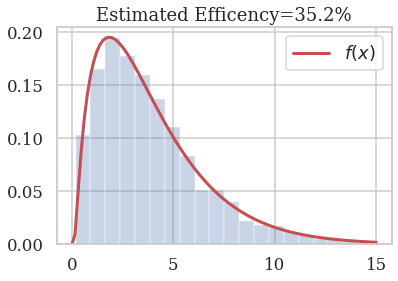

In [45]:
fig,ax = plt.subplots()
ax.hist(v,density = True,bins=20,alpha=.3)
ax.plot(x,fx,'r',lw=3.,label='$f(x)$')
ax.set_title('Estimated Efficency=%3.1f%%'%(100*len(v)/len(u1)))
ax.legend(fontsize=18)

No handles with labels found to put in legend.


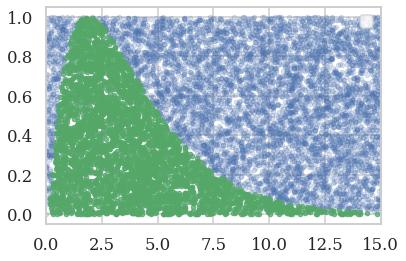

In [46]:
fig,ax = plt.subplots()
ax.plot(u1,u2,'b.', alpha=.2)
ax.plot(u1[idx],u2[idx],'g.', alpha=.7)
ax.set_xlim(0,15)
ax.legend(fontsize=16)

Text(0.5, 1.0, '$h(x)=f(x)/g(x)$')

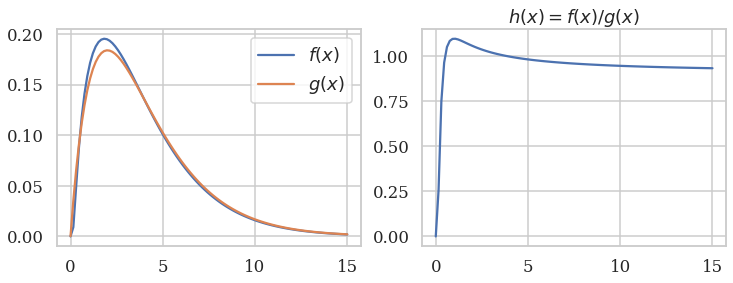

In [47]:
ch= scipy.stats.chi2(4) # chi-squared
h = lambda x: f(x)/ch.pdf(x) # h-function

fig,axs=plt.subplots(1,2)
fig.set_size_inches(12,4)
axs[0].plot(x,fx,label='$f(x)$')
axs[0].plot(x,ch.pdf(x),label='$g(x)$')
axs[0].legend(loc=0,fontsize=18)
axs[1].plot(x,h(x))
axs[1].set_title('$h(x)=f(x)/g(x)$',fontsize=18)

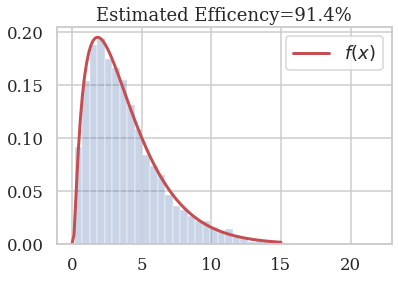

In [49]:
hmax = h(x).max()
u1 = ch.rvs(5000) # samples from chi-square distribution
u2 = np.random.rand(5000)   # uniform random samples
idx = (u2 <= h(u1)/hmax)  # Rejection criterion

v = u1[idx]  # keep these only

fig,ax = plt.subplots()
ax.hist(v,density = True,bins=40,alpha=.3)
ax.plot(x,fx,'r',lw=3.,label='$f(x)$')
ax.set_title('Estimated Efficency=%3.1f%%'%(100*len(v)/len(u1)))
ax.legend(fontsize=18)

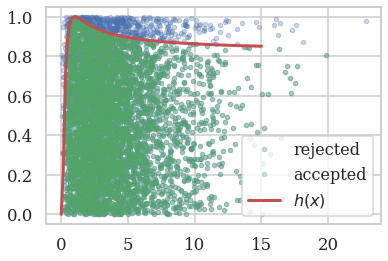

In [50]:
fig,ax = plt.subplots()
ax.plot(u1,u2,'.',label='rejected',alpha=.3)
ax.plot(u1[idx],u2[idx],'g.',label='accepted',alpha=.3)
ax.plot(x,h(x)/hmax,'r',lw=3.,label='$h(x)$')
ax.legend(fontsize=16) 

## Utilizando una distribución Weibull

In [55]:
#a=1.9
#b=2
def interactive_gamma(a,b):
    dist = gamma(a=a, scale=b)
     # chi-squared
    h = lambda x: f(x)/dist.pdf(x) # h-function
    plt.figure(figsize=(15,10))  
    plt.subplot(221)
    plt.plot(x,fx,label='$f(x)$')
    plt.plot(x,dist.pdf(x),label='$g(x)$')
    plt.legend(loc=0,fontsize=18)
    plt.subplot(222)
    plt.plot(x,h(x))
    plt.title('$h(x)=f(x)/g(x)$',fontsize=18)
    plt.subplot(223)
    hmax = h(x).max()
    u1 = dist.rvs(5000) # samples from chi-square distribution
    u2 = np.random.rand(5000)   # uniform random samples
    idx = (u2 <= h(u1)/hmax)  # Rejection criterion
    v = u1[idx]  # keep these only
    plt.hist(v,density = True,bins=40,alpha=.3)
    plt.plot(x,fx,'r',lw=3.,label='$f(x)$')
    plt.title('Estimated Efficency=%3.1f%%'%(100*len(v)/len(u1)))
    plt.legend(fontsize=18)
    plt.xlim(0,16)
    plt.subplot(224)
    plt.plot(u1,u2,'.',label='rejected',alpha=.3)
    plt.plot(u1[idx],u2[idx],'g.',label='accepted',alpha=.3)
    plt.plot(x,h(x)/hmax,'r',lw=3.,label='$h(x)$')
    plt.legend(fontsize=16) 
    plt.xlim(0,16)

input1Float = widgets.FloatSlider(value=2.5, min=0, max=3, step=0.01, description="a :", orientation="horizontal")
input2Float = widgets.FloatSlider(value=2.5, min=0, max=3, step=0.01, description="b :", orientation="horizontal")

widgets.interactive(interactive_gamma, a=input1Float, b=input2Float)

interactive(children=(FloatSlider(value=2.5, description='a :', max=3.0, step=0.01), FloatSlider(value=2.5, de…

In [52]:
'''
hmax = h(x).max()
u1 = dist.rvs(5000) # samples from chi-square distribution
u2 = np.random.rand(5000)   # uniform random samples
idx = (u2 <= h(u1)/hmax)  # Rejection criterion

v = u1[idx]  # keep these only

fig,ax = plt.subplots()
ax.hist(v,normed=1,bins=40,alpha=.3)
ax.plot(x,fx,'r',lw=3.,label='$f(x)$')
ax.set_title('Estimated Efficency=%3.1f%%'%(100*len(v)/len(u1)))
ax.legend(fontsize=18)
'''

"\nhmax = h(x).max()\nu1 = dist.rvs(5000) # samples from chi-square distribution\nu2 = np.random.rand(5000)   # uniform random samples\nidx = (u2 <= h(u1)/hmax)  # Rejection criterion\n\nv = u1[idx]  # keep these only\n\nfig,ax = plt.subplots()\nax.hist(v,normed=1,bins=40,alpha=.3)\nax.plot(x,fx,'r',lw=3.,label='$f(x)$')\nax.set_title('Estimated Efficency=%3.1f%%'%(100*len(v)/len(u1)))\nax.legend(fontsize=18)\n"

In [53]:
'''
fig,ax = plt.subplots()
ax.plot(u1,u2,'.',label='rejected',alpha=.3)
ax.plot(u1[idx],u2[idx],'g.',label='accepted',alpha=.3)
ax.plot(x,h(x)/hmax,'r',lw=3.,label='$h(x)$')
ax.legend(fontsize=16) 
'''

"\nfig,ax = plt.subplots()\nax.plot(u1,u2,'.',label='rejected',alpha=.3)\nax.plot(u1[idx],u2[idx],'g.',label='accepted',alpha=.3)\nax.plot(x,h(x)/hmax,'r',lw=3.,label='$h(x)$')\nax.legend(fontsize=16) \n"

## Utilizando una distribución Triangular

Text(0.5, 1.0, '$h(x)=f(x)/g(x)$')

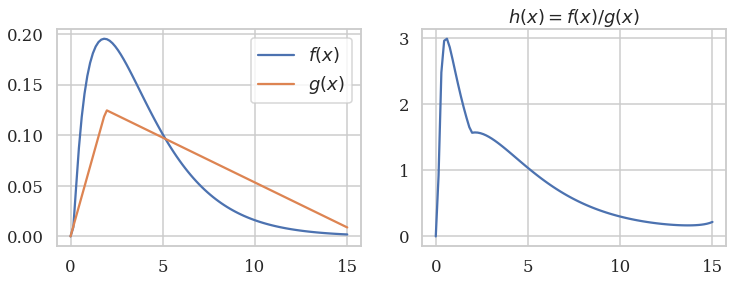

In [57]:
c=0.12
a=0
b=16
dist = triang(c=c, loc=a, scale=b)
 # chi-squared
h = lambda x: f(x)/dist.pdf(x) # h-function

fig,axs=plt.subplots(1,2)
fig.set_size_inches(12,4)
axs[0].plot(x,fx,label='$f(x)$')
axs[0].plot(x,dist.pdf(x),label='$g(x)$')
axs[0].legend(loc=0,fontsize=18)
axs[1].plot(x,h(x))
axs[1].set_title('$h(x)=f(x)/g(x)$',fontsize=18)

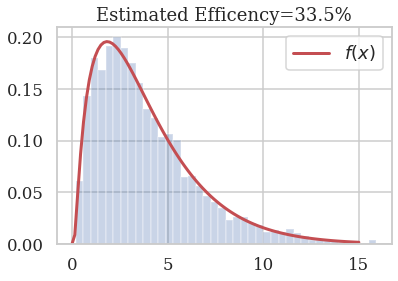

In [59]:
hmax = h(x).max()
u1 = dist.rvs(10000) # samples from chi-square distribution
u2 = np.random.rand(10000)   # uniform random samples
idx = (u2 <= h(u1)/hmax)  # Rejection criterion
v = u1[idx]  # keep these only

fig,ax = plt.subplots()
ax.hist(v,density = True,bins=40,alpha=.3)
ax.plot(x,fx,'r',lw=3.,label='$f(x)$')
ax.set_title('Estimated Efficency=%3.1f%%'%(100*len(v)/len(u1)))
ax.legend(fontsize=18)

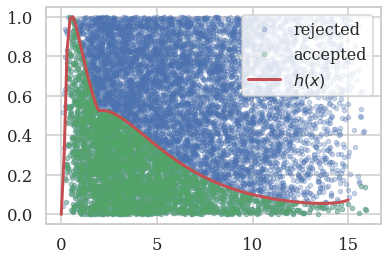

In [60]:
fig,ax = plt.subplots()
ax.plot(u1,u2,'.',label='rejected',alpha=.3)
ax.plot(u1[idx],u2[idx],'g.',label='accepted',alpha=.3)
ax.plot(x,h(x)/hmax,'r',lw=3.,label='$h(x)$')
ax.legend(fontsize=16) 

# Muestreo de variable aleatoria normal

In [62]:
n = 1000
u1 = np.random.random(n) # variable aleatoria 1
u2 = np.random.random(n) # variable aleatoria 2
r_squared = -2*np.log(u1) # M\'etodo de  la inversa
r = np.sqrt(r_squared)
theta = 2*np.pi*u2 # reesaclamiento de u2
x = r*np.cos(theta) # proyecci\'on en x
y = r*np.sin(theta) # Proyecci\'on en y

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


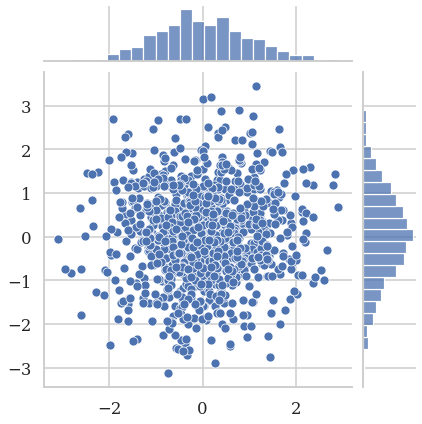

In [63]:
sns.jointplot(x, y, kind='scatter')
pass

In [64]:
def multi_var(rho,var1,var2):
    mean, cov = [0, 0], [(var1, rho), (rho, var2)]
    x, y = np.random.multivariate_normal(mean, cov, 1000).T
    with sns.axes_style("white"):
        sns.jointplot(x=x, y=y, color="b");
    
input1Float = widgets.FloatSlider(value=1, min=-1, max=1, step=0.01, description="rho :", orientation="horizontal")
input2Float = widgets.FloatSlider(value=0.1, min=0.01, max=3, step=0.01, description="var2 :", orientation="horizontal")
input3Float = widgets.FloatSlider(value=0.1, min=0.01, max=3, step=0.01, description="var2 :", orientation="horizontal")
widgets.interactive(multi_var, rho=input1Float, var1=input2Float, var2=input3Float)

interactive(children=(FloatSlider(value=1.0, description='rho :', max=1.0, min=-1.0, step=0.01), FloatSlider(v…